In [1]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to parse a brat file and count entities by class
def count_entities(file_path):
    # Read the content of the brat file
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.readlines()

    # Initialize defaultdict to count entities by class
    entity_counts = defaultdict(int)

    # Parse each line in the brat file
    for line in content:
        # Split the line into components
        components = line.split("\t")
        if len(components) > 1:
            # Extract entity class
            entity_class = components[1].split()[0]

            # Count entities by class
            entity_counts[entity_class] += 1

    return entity_counts

# Function to plot entity counts by class
def plot_entity_counts(entity_counts):
    # Extract entity classes and counts
    classes = list(entity_counts.keys())
    counts = list(entity_counts.values())

    # Plotting
    plt.figure(figsize=(100, 60))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Entity Class')
    plt.ylabel('Count')
    plt.title('Entity Counts by Class')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Directory containing brat files
directory = "/Users/oaouina/Applications/brat_Annotator/data/annotatedCrhFinal2024/AnnotationTotal"

# Initialize defaultdict to accumulate counts from all files
total_entity_counts = defaultdict(int)

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".ann"):
        file_path = os.path.join(directory, filename)
        # Count entities in the current file
        entity_counts = count_entities(file_path)
        # Accumulate counts from all files
        for entity_class, count in entity_counts.items():
            total_entity_counts[entity_class] += count

# Plot the total entity counts
plot_entity_counts(total_entity_counts)


In [3]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to parse a brat file and count entities by class, excluding AnnotatorNotes
def count_entities(file_path):
    # Read the content of the brat file
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.readlines()

    # Initialize defaultdict to count entities by class
    entity_counts = defaultdict(int)

    # Parse each line in the brat file
    for line in content:
        # Split the line into components
        components = line.split("\t")
        if len(components) > 1 and components[1].split()[0] != "AnnotatorNotes" and  "annotationsToAdd" not in components[1]:
            # Extract entity class
            entity_class = components[1].split()[0]

            # Count entities by class
            entity_counts[entity_class] += 1

    return entity_counts

# Function to plot entity counts by class
def plot_entity_counts(entity_counts):
    # Extract entity classes and counts
    classes = list(entity_counts.keys())
    counts = list(entity_counts.values())

    # Plotting
    plt.figure(figsize=(100, 60))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Entity Class', fontsize=50)
    plt.ylabel('Count', fontsize=50)
    plt.title('Entity Counts by Class', fontsize=50)
    plt.xticks(fontsize=50,rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Directory containing brat files
directory = "/Users/oaouina/Applications/brat_Annotator/data/annotatedCrhFinal2024/AnnotationTotal"

# Initialize defaultdict to accumulate counts from all files
total_entity_counts = defaultdict(int)

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".ann"):
        file_path = os.path.join(directory, filename)
        # Count entities in the current file
        entity_counts = count_entities(file_path)
        # Accumulate counts from all files
        for entity_class, count in entity_counts.items():
            total_entity_counts[entity_class] += count

# Plot the total entity counts
plot_entity_counts(total_entity_counts)


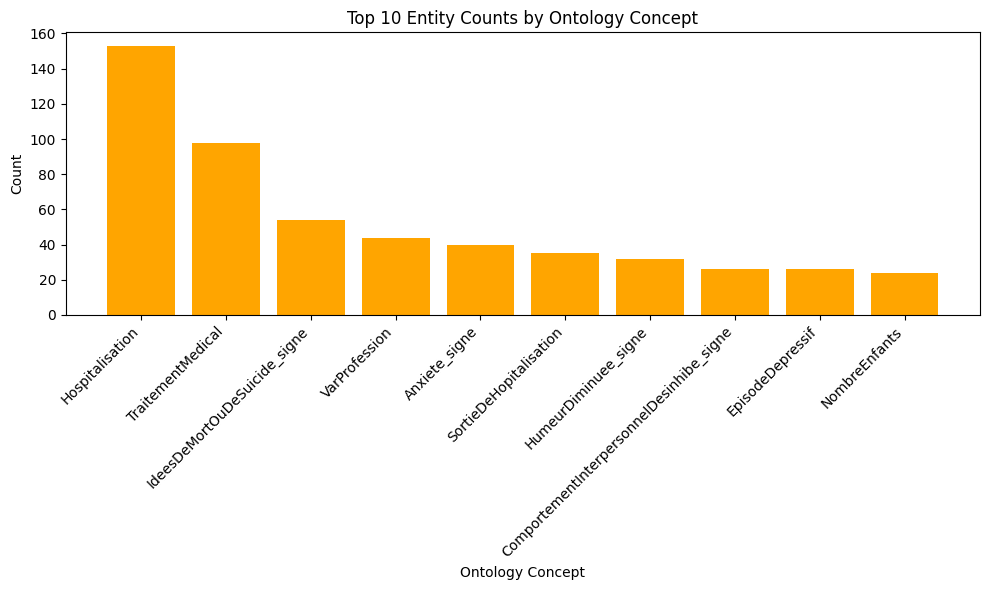

In [4]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to parse a brat file and count entities by ontology IRI in AnnotatorNotes
def count_entities_by_iri(file_path):
    # Read the content of the brat file
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.readlines()

    # Initialize defaultdict to count entities by ontology IRI
    iri_counts = defaultdict(int)

    # Parse each line in the brat file
    for line in content:
        # Split the line into components
        components = line.split("\t")
        if len(components) > 1 and "AnnotatorNotes" in components[1]:
            # Extract ontology IRI
            iri = components[2].strip()

            # Count entities by ontology IRI
            iri_counts[iri] += 1

    return iri_counts

# Function to extract concept name from the ontology IRI
def extract_concept_name(iri):
    return iri.split("#")[-1]

# Function to plot entity counts by ontology IRI
def plot_entity_counts_by_iri(iri_counts):
    # Sort the dictionary by value in descending order
    sorted_counts = dict(sorted(iri_counts.items(), key=lambda item: item[1], reverse=True))

    # Get the top 10 IRIs and their counts
    top_10_irirs = list(sorted_counts.keys())[:10]
    top_10_counts = [sorted_counts[iri] for iri in top_10_irirs]

    # Extract concept names for x-axis labels
    concept_names = [extract_concept_name(iri) for iri in top_10_irirs]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(concept_names, top_10_counts, color='orange')
    plt.xlabel('Ontology Concept')
    plt.ylabel('Count')
    plt.title('Top 10 Entity Counts by Ontology Concept')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
# Directory containing brat files

# Initialize defaultdict to accumulate counts from all files
total_iri_counts = defaultdict(int)

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".ann"):
        file_path = os.path.join(directory, filename)
        # Count entities by ontology IRI in the current file
        iri_counts = count_entities_by_iri(file_path)
        # Accumulate counts from all files
        for iri, count in iri_counts.items():
            total_iri_counts[iri] += count

# Plot the entity counts by ontology IRI
plot_entity_counts_by_iri(total_iri_counts)


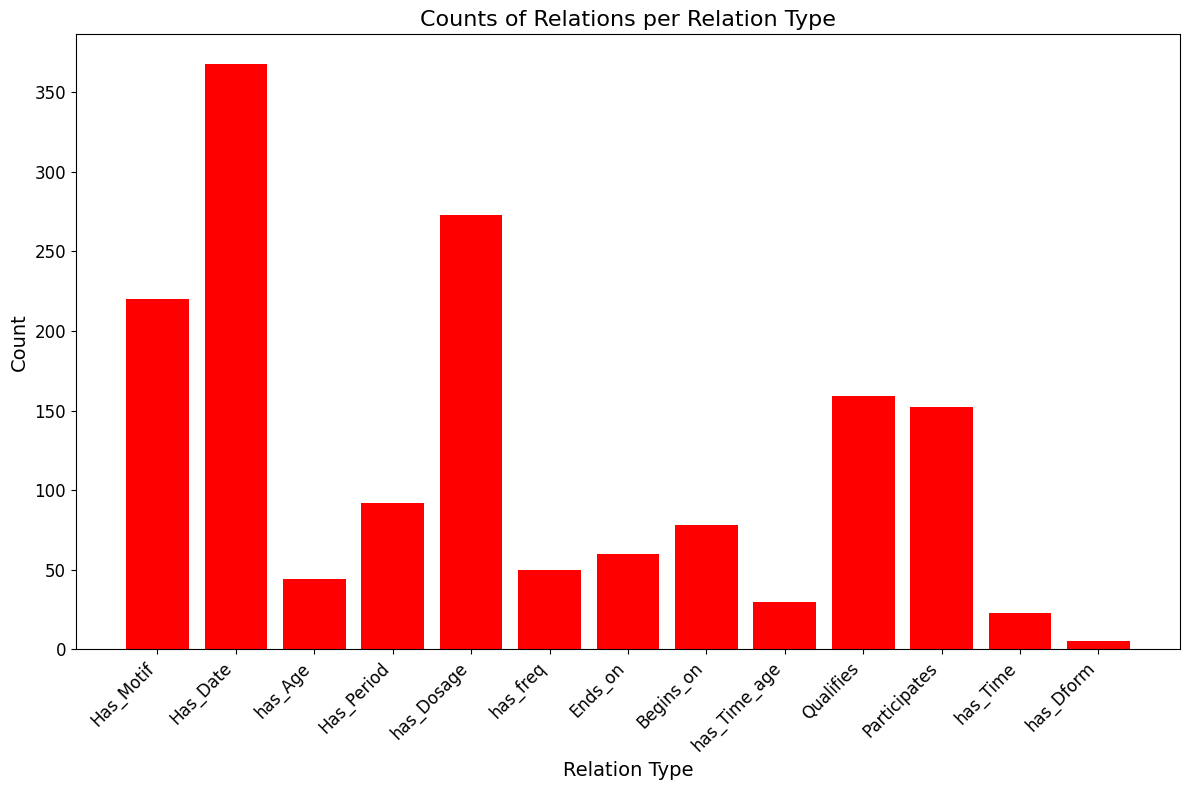

In [6]:

# Function to parse a brat file and count relations per relation type
def count_relations(file_path):
    # Read the content of the brat file
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.readlines()

    # Initialize defaultdict to count relations per relation type
    relation_counts = defaultdict(int)

    # Parse each line in the brat file
    for line in content:
        # Split the line into components
        components = line.split("\t")
        # Check if it's a relation line
        if len(components) > 1 and components[0].startswith("R"):
            # Extract the relation type
            relation_type = components[1].split(" ")[0]
            # Increment the count for this relation type
            relation_counts[relation_type] += 1

    return relation_counts

# Function to plot relation counts
def plot_relation_counts(relation_counts):
    # Extract relation types and counts
    relation_types = list(relation_counts.keys())
    counts = list(relation_counts.values())

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.bar(relation_types, counts, color='red')
    plt.xlabel('Relation Type', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Counts of Relations per Relation Type', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Directory containing brat files
#directory = "/Users/oaouina/Applications/brat_Annotator/data/processed_crh_test_feb24 "
directory = '/Users/oaouina/Applications/brat_Annotator/data/annotatedCrhFinal2024/AnnotationTotal'

# Initialize defaultdict to accumulate counts from all files
total_relation_counts = defaultdict(int)

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".ann"):
        file_path = os.path.join(directory, filename)
        # Count relations in the current file
        relation_counts = count_relations(file_path)
        # Accumulate counts from all files
        for relation_type, count in relation_counts.items():
            total_relation_counts[relation_type] += count

# Plot the counts of relations per relation type
plot_relation_counts(total_relation_counts)

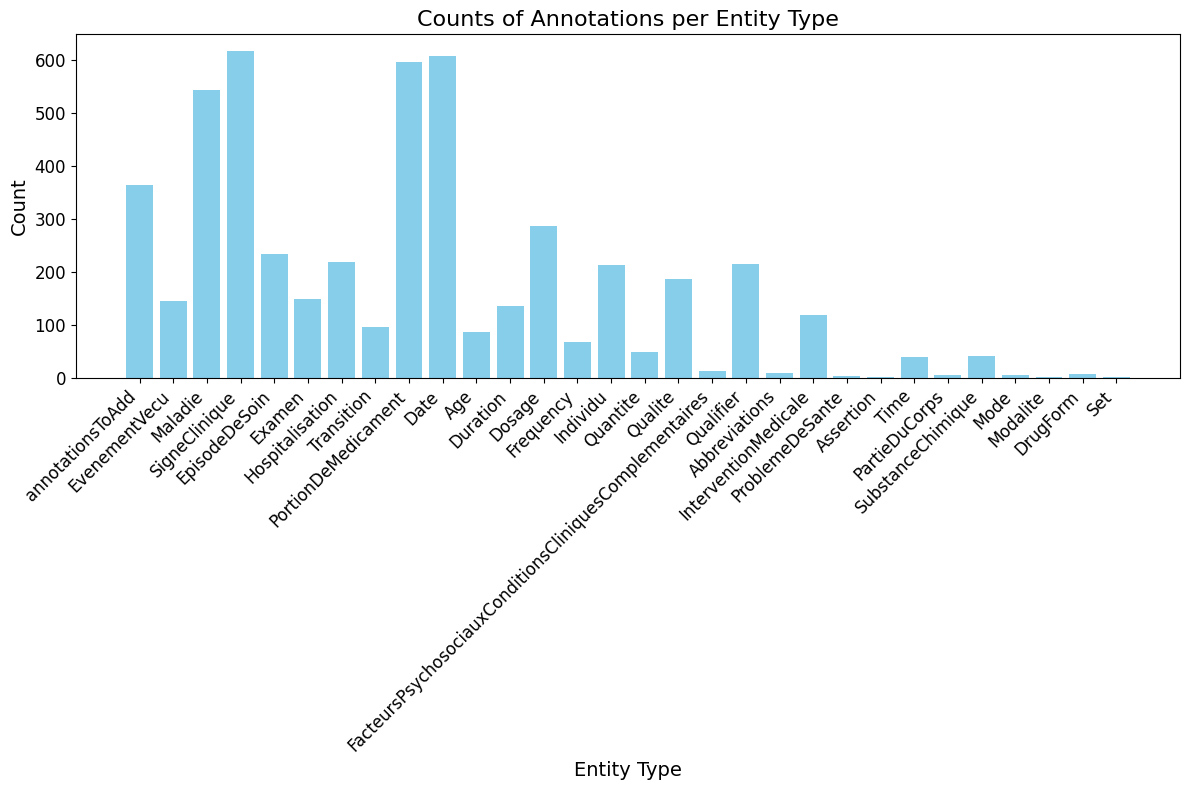

In [8]:
# Function to parse a brat file and count relations per relation type
def count_entities(file_path):
    # Read the content of the brat file
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.readlines()

    # Initialize defaultdict to count relations per relation type
    relation_counts = defaultdict(int)

    # Parse each line in the brat file
    for line in content:
        # Split the line into components
        components = line.split("\t")
        # Check if it's a relation line
        if len(components) > 1 and components[0].startswith("T"):
            # Extract the relation type
            relation_type = components[1].split(" ")[0]
            # Increment the count for this relation type
            relation_counts[relation_type] += 1

    return relation_counts

# Function to plot relation counts
def plot_relation_counts(relation_counts):
    # Extract relation types and counts
    relation_types = list(relation_counts.keys())
    counts = list(relation_counts.values())

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.bar(relation_types, counts, color='skyblue')
    plt.xlabel('Entity Type', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Counts of Annotations per Entity Type', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

# Directory containing brat files
#directory = "/Users/oaouina/Applications/brat_Annotator/data/processed_crh_test_feb24 "
directory = '/Users/oaouina/Applications/brat_Annotator/data/annotatedCrhFinal2024/AnnotationTotal'

# Initialize defaultdict to accumulate counts from all files
total_relation_counts = defaultdict(int)

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".ann"):
        file_path = os.path.join(directory, filename)
        # Count relations in the current file
        relation_counts = count_entities(file_path)
        # Accumulate counts from all files
        for relation_type, count in relation_counts.items():
            total_relation_counts[relation_type] += count

# Plot the counts of relations per relation type
plot_relation_counts(total_relation_counts)

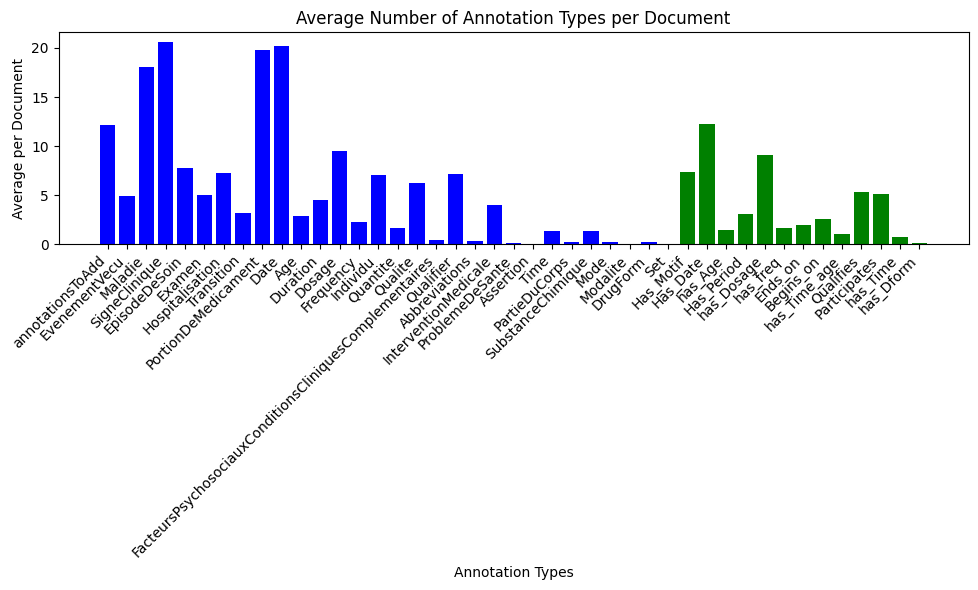

In [9]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Sample data input as a list of strings, where each string represents annotations from a document
from collections import defaultdict

import os
import re

def extract_annotations(folder_path):
    annotations_list = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".ann"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as file:
                annotations = ""
                for line in file:
                    # This checks if the line starts with T or R, which you're interested in.
                    if line.startswith(('T', 'R')):
                        annotations += line
                annotations_list.append(annotations.strip())
    return annotations_list

def process_documents(folder_path):
    # Extract annotations from all .ann files
    annotations_list = extract_annotations(folder_path)
    # Further processing can be done here, like calculating averages, etc.
    # For now, just return the list
    return annotations_list

# Example usage:
directory = '/Users/oaouina/Applications/brat_Annotator/data/annotatedCrhFinal2024/AnnotationTotal’'
all_annotations = process_documents(directory)

def calculate_detailed_annotations_statistics(annotations):
    # Initialize counters
    entity_counts = defaultdict(int)
    relation_counts = defaultdict(int)
    entity_type_counts = defaultdict(int)
    relation_type_counts = defaultdict(int)
    documents_count = len(annotations)
    
    # Process each document
    for annotation in annotations:
        # Splitting the document into lines
        lines = annotation.strip().split('\n')
        for line in lines:
            if line.startswith('T'):
                entity_counts[line.split('\t')[0]] += 1  # Count each entity
                entity_type = line.split()[1]  # Extract entity type
                entity_type_counts[entity_type] += 1
            elif line.startswith('R'):
                relation_counts[line.split('\t')[0]] += 1  # Count each relation
                relation_type = line.split()[1]  # Extract relation type
                relation_type_counts[relation_type] += 1
    
    # Calculate averages
    avg_entities_per_document = sum(entity_counts.values()) / documents_count if documents_count else 0
    avg_relations_per_document = sum(relation_counts.values()) / documents_count if documents_count else 0
    avg_per_entity_type = {etype: count / documents_count for etype, count in entity_type_counts.items()}
    avg_per_relation_type = {rtype: count / documents_count for rtype, count in relation_type_counts.items()}
    
    # Prepare the result table
    result = {
        "Total Documents": documents_count,
        "Total Entities": sum(entity_counts.values()),
        "Total Relations": sum(relation_counts.values()),
        "Average Entities per Document": avg_entities_per_document,
        "Average Relations per Document": avg_relations_per_document,
        "Average per Entity Type": avg_per_entity_type,
        "Average per Relation Type": avg_per_relation_type
    }
    
    return result

# Calculate and display the detailed statistics
detailed_annotations_statistics = calculate_detailed_annotations_statistics(all_annotations)
detailed_annotations_statistics



# Data for plotting
categories = list(detailed_annotations_statistics['Average per Entity Type'].keys()) + list(detailed_annotations_statistics['Average per Relation Type'].keys())
averages = list(detailed_annotations_statistics['Average per Entity Type'].values()) + list(detailed_annotations_statistics['Average per Relation Type'].values())

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, averages, color=['blue' if i < len(detailed_annotations_statistics['Average per Entity Type']) else 'green' for i in range(len(categories))])
plt.xlabel('Annotation Types')
plt.ylabel('Average per Document')
plt.title('Average Number of Annotation Types per Document')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the chart
plt.show()

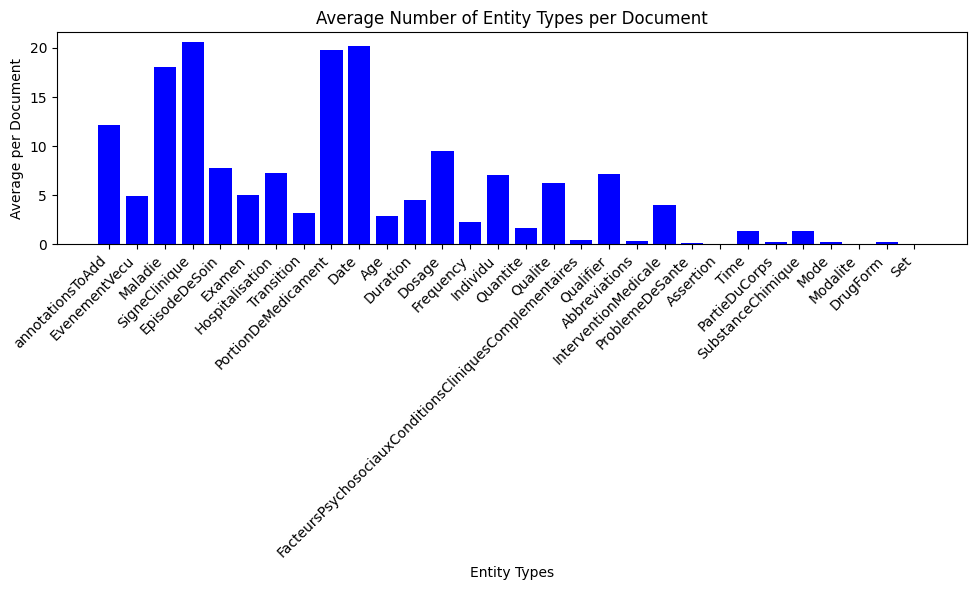

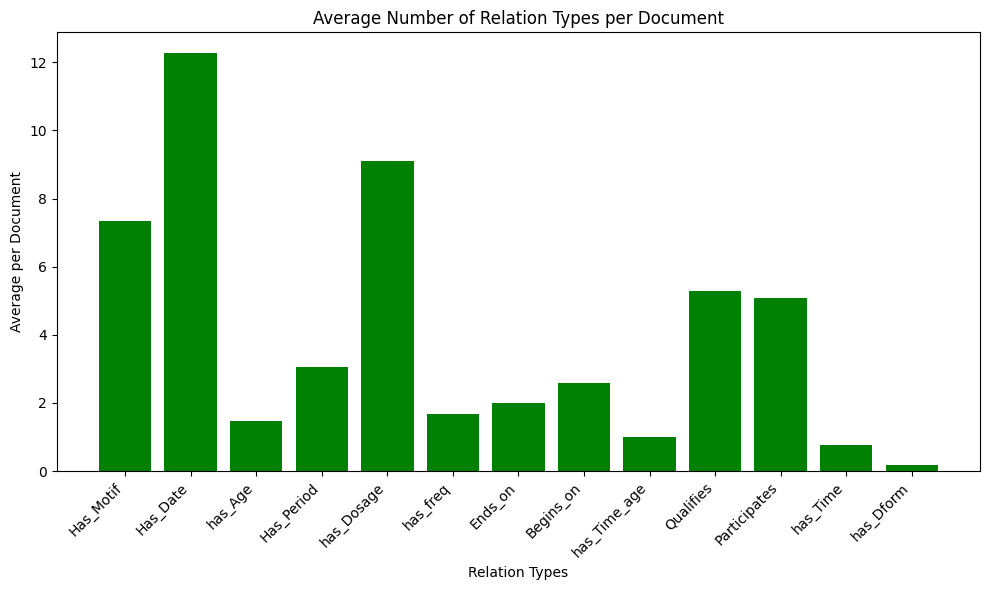

In [10]:
# Separate the data for plotting two charts: one for entities and one for relations
entity_categories = list(detailed_annotations_statistics['Average per Entity Type'].keys())
entity_averages = list(detailed_annotations_statistics['Average per Entity Type'].values())
relation_categories = list(detailed_annotations_statistics['Average per Relation Type'].keys())
relation_averages = list(detailed_annotations_statistics['Average per Relation Type'].values())

# Creating the bar chart for Entities
plt.figure(figsize=(10, 6))
plt.bar(entity_categories, entity_averages, color='blue')
plt.xlabel('Entity Types')
plt.ylabel('Average per Document')
plt.title('Average Number of Entity Types per Document')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Creating the bar chart for Relations
plt.figure(figsize=(10, 6))
plt.bar(relation_categories, relation_averages, color='green')
plt.xlabel('Relation Types')
plt.ylabel('Average per Document')
plt.title('Average Number of Relation Types per Document')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [8]:
’’

SyntaxError: invalid character '’' (U+2019) (3135408468.py, line 1)

In [1]:
# essential libraries
import os 
import pandas as pd
import numpy as np

# regular expression import
import re

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()

    # Use tokenizer
    string = tokenizer.tokenize(string, return_str = True)

    return string

def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()

    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]

    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

def clean(text):
    '''
    This function combines the above steps and added extra stop words to clean text
    '''
    return remove_stopwords(lemmatize(basic_clean(text)))